## Association Rules 

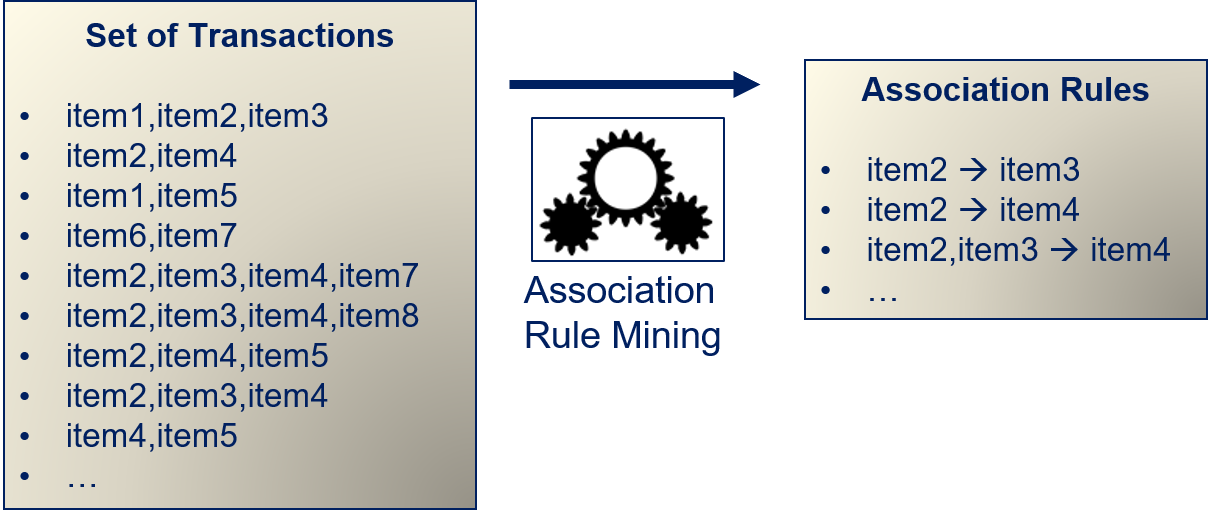

In [3]:
!pip install mlxtend

In [14]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataset = [['A','C','D'],
    ['B','C','E'],
    ['A','B','C','E'],
    ['B','E'],]
# applying transation endecoder 
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
# building transactions dataframe
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)


       A      B      C      D      E
0   True  False   True   True  False
1  False   True   True  False   True
2   True   True   True  False   True
3  False   True  False  False   True



***in transaction 0 we have only a c d items because of that b and e false***


In [16]:
#min_supp=2--> 4 Transcation, relative support=0.5(2/4=0.5)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
# calculate itemset length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)



   support   itemsets  length
0     0.50        (A)       1
1     0.75        (B)       1
2     0.75        (C)       1
3     0.75        (E)       1
4     0.50     (A, C)       2
5     0.50     (B, C)       2
6     0.75     (E, B)       2
7     0.50     (E, C)       2
8     0.50  (E, B, C)       3


In [17]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frequent_itemsets,metric="confidence", min_threshold=0.8) # metric="lift"
rules = rules.sort_values(['confidence'], ascending =[False])
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0         (A)         (C)                0.50                0.75     0.50   
1         (E)         (B)                0.75                0.75     0.75   
2         (B)         (E)                0.75                0.75     0.75   
3      (E, C)         (B)                0.50                0.75     0.50   
4      (B, C)         (E)                0.50                0.75     0.50   

   confidence      lift  leverage  conviction  
0         1.0  1.333333    0.1250         inf  
1         1.0  1.333333    0.1875         inf  
2         1.0  1.333333    0.1875         inf  
3         1.0  1.333333    0.1250         inf  
4         1.0  1.333333    0.1250         inf  


Lift = 1 if X and Y are statistically independent <br>
• Lift > 1 indicates the degree of usefulness of the rule(stronger association) <br>
Leverage = 0 if X and Y are statistically independent <br>
• Leverage > 0 indicates degree of usefulness of rule

In [18]:
#لو طلبت اللفت
rules = association_rules(frequent_itemsets,metric="lift", min_threshold=0.8) # metric="lift"
rules = rules.sort_values(['confidence'], ascending =[False])
print(rules)

   antecedents consequents  antecedent support  consequent support  support  \
0          (A)         (C)                0.50                0.75     0.50   
4          (E)         (B)                0.75                0.75     0.75   
5          (B)         (E)                0.75                0.75     0.75   
9       (E, C)         (B)                0.50                0.75     0.50   
10      (B, C)         (E)                0.50                0.75     0.50   
1          (C)         (A)                0.75                0.50     0.50   
2          (B)         (C)                0.75                0.75     0.50   
3          (C)         (B)                0.75                0.75     0.50   
6          (E)         (C)                0.75                0.75     0.50   
7          (C)         (E)                0.75                0.75     0.50   
8       (E, B)         (C)                0.75                0.75     0.50   
11         (E)      (B, C)                0.75      

## Transactions in a Grocery Store

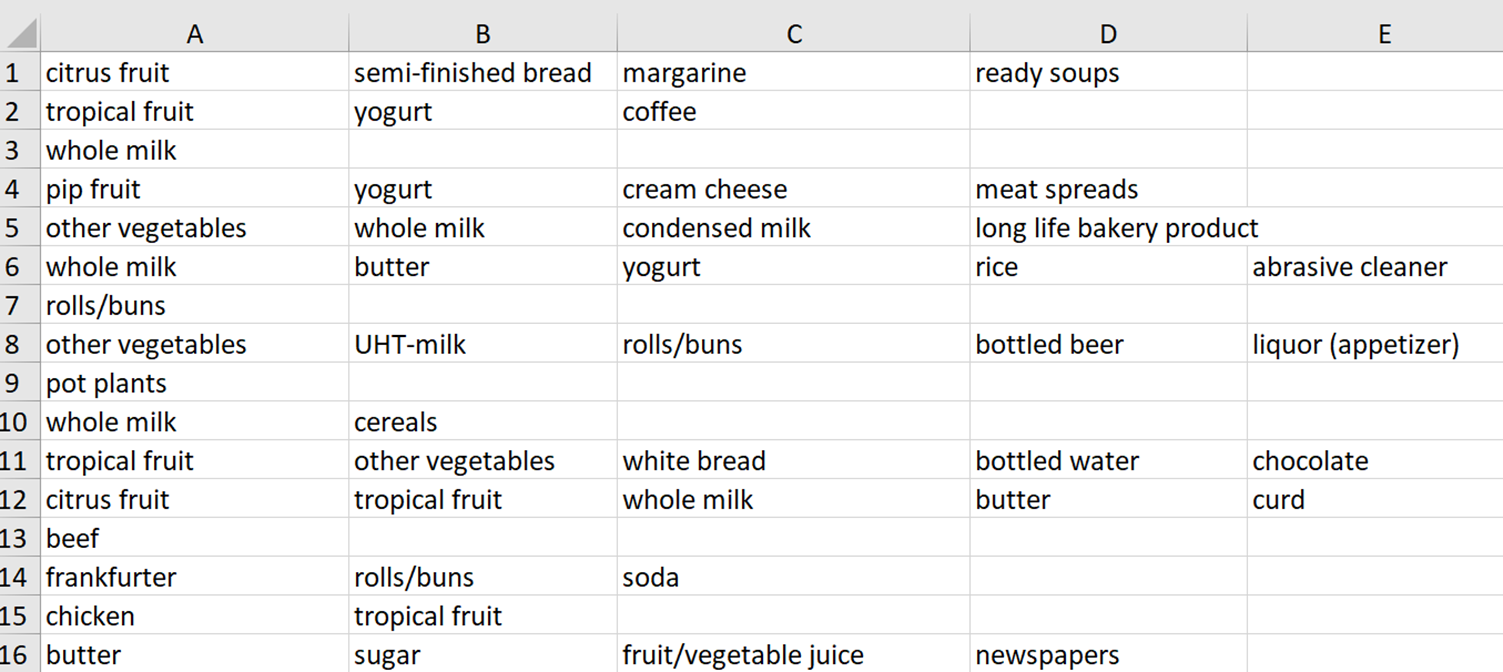

In [27]:
# Loading the Data
df = pd.read_csv('Groceries.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


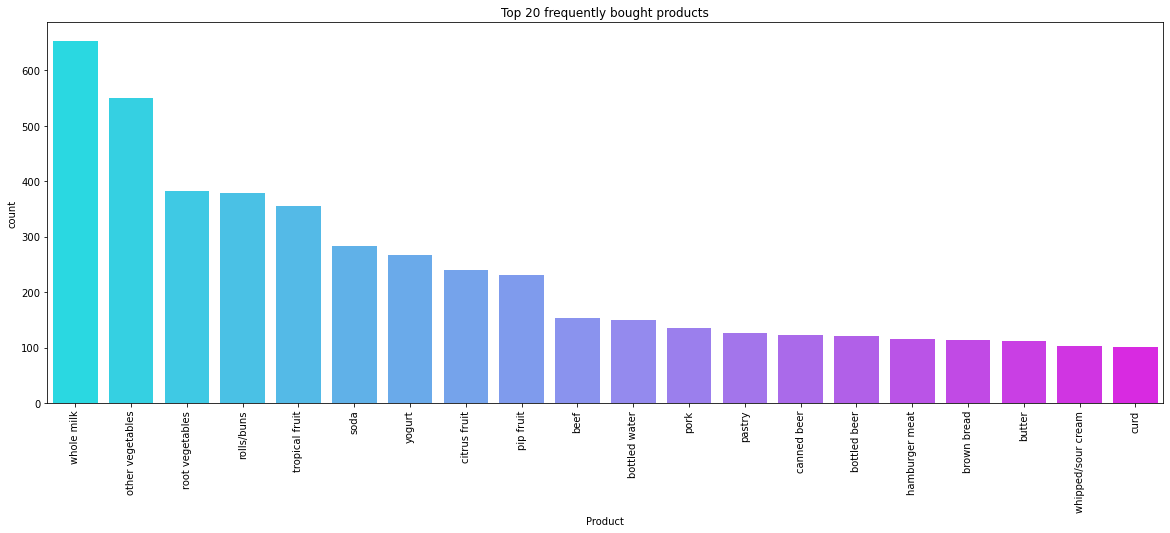

In [28]:
#Top 20 frequently buying items by customer
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=df, x=df[1],
             order = df[1].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

In [29]:
# applying transation endecoder 
df =  df.T.apply(lambda x: x.dropna().tolist()).tolist()
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)

# building transactions dataframe
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True, max_len=2) #max_len (طول الايتمز ماراح يطلع لي اللي اعلى من2)

# calculate itemset length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)


      support                          itemsets  length
0    0.033452                        (UHT-milk)       1
1    0.052466                            (beef)       1
2    0.033249                         (berries)       1
3    0.026029                       (beverages)       1
4    0.080529                    (bottled beer)       1
..        ...                               ...     ...
115  0.042298      (tropical fruit, whole milk)       2
116  0.029283          (tropical fruit, yogurt)       2
117  0.032232  (whole milk, whipped/sour cream)       2
118  0.020742      (yogurt, whipped/sour cream)       2
119  0.056024              (yogurt, whole milk)       2

[120 rows x 3 columns]


120 frequent itemset

In [30]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] > 0.04) ]
#counting by length-->len() 
#OR=|

,support,itemsets,length
84,0.042603,"(rolls/buns, other vegetables)",2
85,0.047382,"(other vegetables, root vegetables)",2
91,0.074835,"(whole milk, other vegetables)",2
92,0.043416,"(yogurt, other vegetables)",2
103,0.056634,"(rolls/buns, whole milk)",2
106,0.048907,"(whole milk, root vegetables)",2
113,0.040061,"(whole milk, soda)",2
115,0.042298,"(tropical fruit, whole milk)",2
119,0.056024,"(yogurt, whole milk)",2


In [31]:
len(frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] > 0.04) ])

9

In [32]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {"whole milk", "yogurt"} ]

,support,itemsets,length
119,0.056024,"(yogurt, whole milk)",2


In [33]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.40)
rules = rules.sort_values(['confidence'], ascending =False)
print(rules)

             antecedents         consequents  antecedent support  \
1               (butter)        (whole milk)            0.055414   
2                 (curd)        (whole milk)            0.053279   
3        (domestic eggs)        (whole milk)            0.063447   
10  (whipped/sour cream)        (whole milk)            0.071683   
8      (root vegetables)        (whole milk)            0.108998   
6      (root vegetables)  (other vegetables)            0.108998   
4    (frozen vegetables)        (whole milk)            0.048094   
5            (margarine)        (whole milk)            0.058566   
0                 (beef)        (whole milk)            0.052466   
9       (tropical fruit)        (whole milk)            0.104931   
7   (whipped/sour cream)  (other vegetables)            0.071683   
11              (yogurt)        (whole milk)            0.139502   

    consequent support   support  confidence      lift  leverage  conviction  
1             0.255516  0.027555    

in transactions 6 lift is 2.24 
Therefore, it can be concluded that(root vegetables) and(other vegetables) have a strong association.

In [34]:
rules.shape

(12, 9)

## Scatterplots
We decide to start by plotting support and confidence, since all optimal rules according to many common metrics are located on the confidence-supply border.

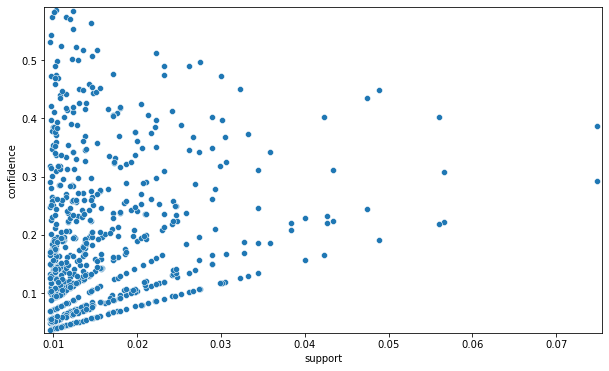

In [35]:
## Apply the Apriori algorithm with a support value of 0.0095
frequent_itemsets = apriori(df, min_support = 0.0095, 
                            use_colnames = True)

# Generate association rules without performing additional pruning
rules1 = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = rules1)
plt.margins(0.01,0.01)
plt.show()

Notice that the confidence-support border roughly forms a triangle. This suggests that throwing out some low support rules would also mean that we would discard rules that are strong according to many common metrics.

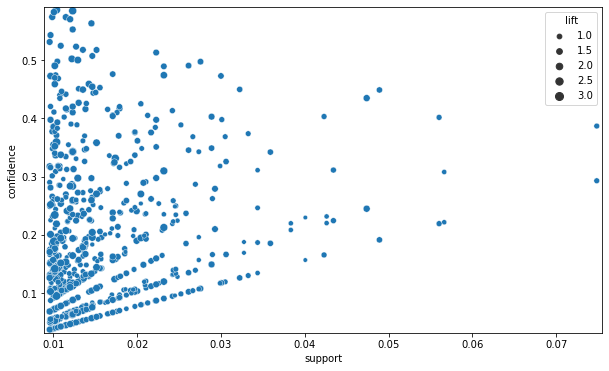

In [38]:

## Apply the Apriori algorithm with a support value of 0.0095
frequent_itemsets = apriori(df, min_support = 0.0095, 
                            use_colnames = True)

# Generate association rules without performing additional pruning
rules2 = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)
#Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules2)
plt.margins(0.01,0.01)
plt.show()

Recalling that scatterplots can scale the size of dots according to a third metric, we decide to use that to demonstrate optimality of the support-confidence border. We will show this by scaling the dot size using the lift metric.<br>
confidence considers only the antecedent (X) and the co-occurrence of X and Y
• Cannot tell if a rule contains the true implication

## Heatmaps with lift
Heatmaps help us understand a large number of rules between a small number of antecedents and consequents.

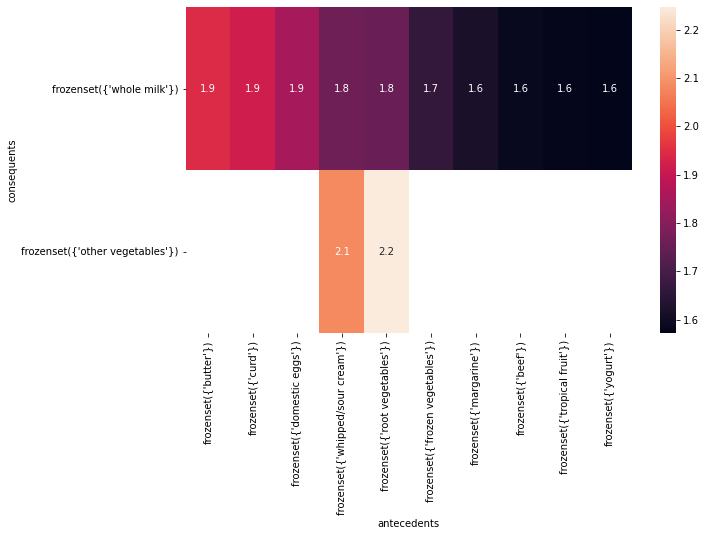

In [42]:
# Import seaborn under its standard alias
import seaborn as sns

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

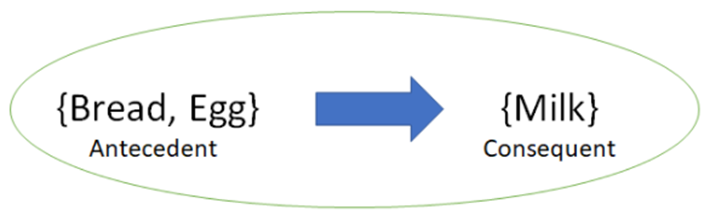

In [43]:
targeted_rules = rules[rules['consequents'] == {'whole milk'}]

In [44]:
filtered_rules = targeted_rules[(targeted_rules['lift'] > 1.7)]
len(filtered_rules)

5

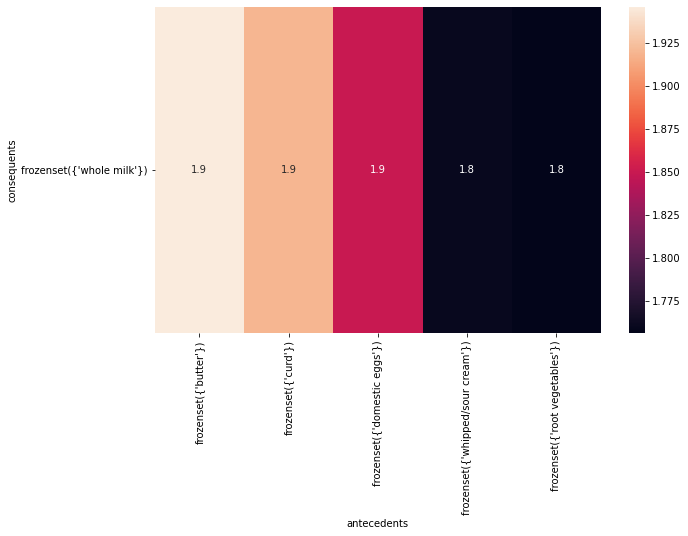

In [45]:
#let's analyse the 'baby foods' relevent consequents

support_table = filtered_rules.pivot(index='consequents', columns='antecedents', values='lift')
plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


## Parallel coordinates plot
The parallel coordinates plot will allow us to visualize whether a relationship exist between an antecedent and consequent. We can think of it as a directed network diagram. The plot shows connections between  2  objects that are related and indicates the direction of the relationship.

In [46]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
coords = rules[['antecedent','consequent','rule']]

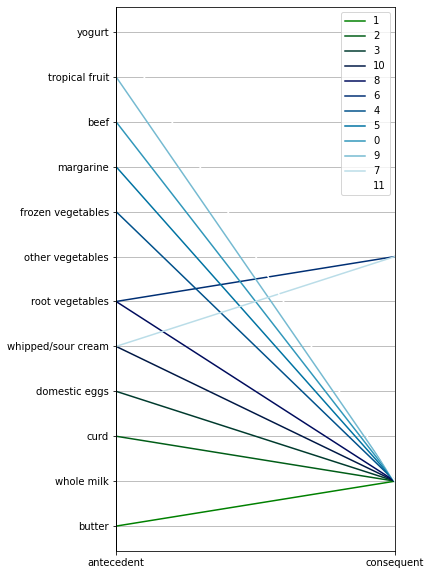

In [47]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
plt.rcParams['figure.figsize']=5,10
parallel_coordinates(coords,'rule', colormap = 'ocean')
plt.show()